**Time Series Analysis**

Saving index_2.csv to index_2.csv


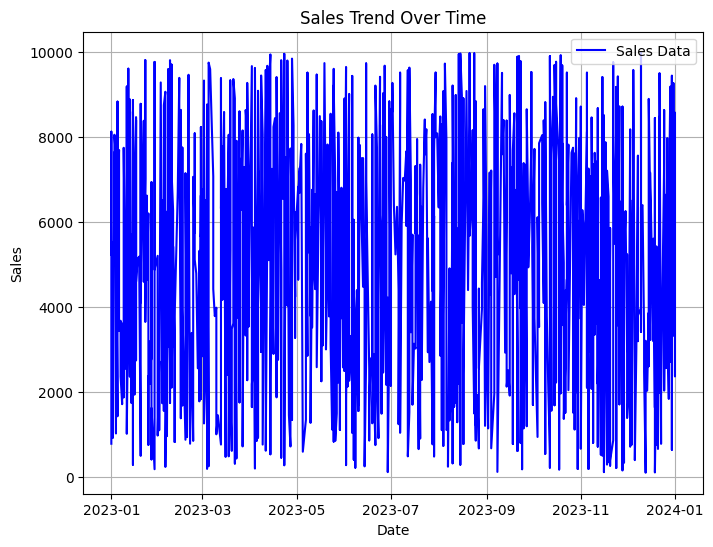

In [ ]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()
# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load and parse the dataset
df = pd.read_csv("sales_data.csv", parse_dates=["Sale_Date"])
df.set_index("Sale_Date", inplace=True)

# Step 4: Sort the data to ensure chronological plotting
df.sort_index(inplace=True)

# Step 5: Plot the sales trend
plt.figure(figsize=(8, 6))
plt.plot(df.index, df["Sales_Amount"], label="Sales Data", color='blue')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Aggregate sales by date to handle duplicate indices
daily_sales = df.groupby(df.index)['Sales_Amount'].sum().reset_index()
daily_sales.set_index('Sale_Date', inplace=True)
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.asfreq('D').fillna(0)


# Split data: 80% train, 20% test
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# ARIMA model (tune order=(p,d,q) if needed)
order = (5, 1, 5)
model = ARIMA(train["Sales_Amount"], order=order)
model_fit = model.fit()

# Forecast future sales for test set length
forecast = model_fit.forecast(steps=len(test))

# Evaluate model
rmse = np.sqrt(mean_squared_error(test["Sales_Amount"], forecast))
mape = mean_absolute_percentage_error(test["Sales_Amount"], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")

RMSE: 11406.57
MAPE: 485738228255943884800.00%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


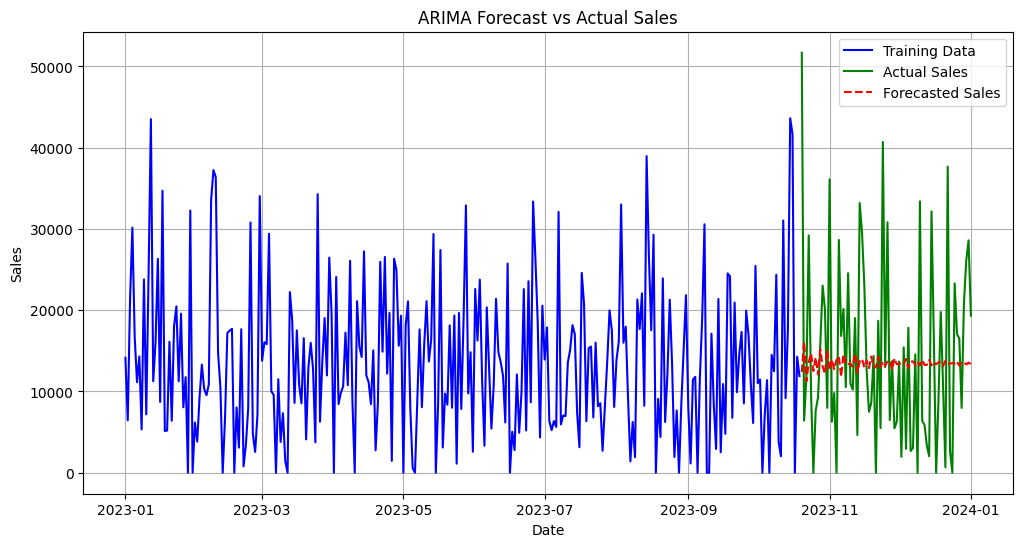

In [ ]:
# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["Sales_Amount"], label="Training Data", color='blue')
plt.plot(test.index, test["Sales_Amount"], label="Actual Sales", color='green')
plt.plot(test.index, forecast, label="Forecasted Sales", color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("ARIMA Forecast vs Actual Sales")
plt.legend()
plt.grid(True)
plt.show()

**Predicting Heart Disease Using
Logistic Regression**

Missing Values:
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Accuracy: 0.90
Confusion Matrix:
 [[40803   466]
 [ 4113   575]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.55      0.12      0.20      4688

    accuracy                           0.90     45957
   macro avg       0.73      0.56      0.57     45957
weighted avg       0.87      0.90    

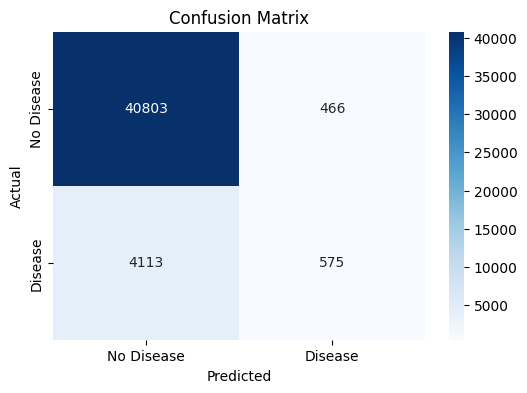

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
df = pd.read_csv("heart csv.csv")
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.fillna(df.mean(), inplace=True)

# 2. Define features and target
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']

# 3. Feature scaling
scaler = StandardScaler()
X[['Age', 'BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X[['Age', 'BMI', 'MentHlth', 'PhysHlth']])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model training
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 6. Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# 7. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart csv.csv to heart csv.csv
